In [1]:
# This is the code for ECE9039 (Machine Learning) course project, written by Pegah Jalili.
# The code contains a CNN model for text classification for the purpose of sentiment analysis.
# It classifies social midea comments into 3 categories : "Negative", "Neutral" and "Positive".

# Import nessesary libraries.
from tensorflow.keras import layers, models,metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import time

# The imported dataset is not the original Kaggle dataset. It is the output of labeling process performed by other team member.
df = pd.read_csv('Labeled Data.csv')

In [2]:
# Preprocess the data.

# Create a Tokenizer object with a vocabulary size of 10,000 and a special out-of-vocabulary token.
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['comment_body'])

# Convert the text data in the 'comment_body' into sequences of integers using the Tokenizer object.
sequences = tokenizer.texts_to_sequences(df['comment_body'])

# Pad or truncate the sequences to a fixed length of 100.
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Convert the 'Sentiment' column into an array of binary values, where each row represents a comment and each column represents a sentiment label.
encoder = OneHotEncoder()
y = encoder.fit_transform(df['Sentiment'].values.reshape(-1,1)).toarray()
print(y)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [3]:
# Split the preprocessed data into 80% training set and 20% testing set.
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [4]:
#Design the CNN model.
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=16, input_length=100),
    layers.Conv1D(32, 5, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Dropout(0.5),
    layers.Conv1D(64, 5, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Adjust the learning rate to handle overfitting.
optimizer = optimizers.Adam(learning_rate=0.0006)
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 96, 32)            2592      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 44, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 22, 64)           0         
 1D)                                                    

In [5]:
# Train the model on the training data for 5 epochs, using a batch size of 32 and validate the model on the test data after each epoch.
# Record the stars time and end time of training process.
start_time = time.time()
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()

Epoch 1/5
1311/1311 [==============================] - 33s 22ms/step - loss: 0.7192 - accuracy: 0.7060 - precision: 0.7409 - recall: 0.6538 - val_loss: 0.6293 - val_accuracy: 0.7464 - val_precision: 0.7928 - val_recall: 0.6747
Epoch 2/5
1311/1311 [==============================] - 28s 21ms/step - loss: 0.5142 - accuracy: 0.7911 - precision: 0.8125 - recall: 0.7636 - val_loss: 0.4747 - val_accuracy: 0.8086 - val_precision: 0.8358 - val_recall: 0.7732
Epoch 3/5
1311/1311 [==============================] - 28s 21ms/step - loss: 0.4028 - accuracy: 0.8379 - precision: 0.8509 - recall: 0.8225 - val_loss: 0.4448 - val_accuracy: 0.8163 - val_precision: 0.8346 - val_recall: 0.7956
Epoch 4/5
1311/1311 [==============================] - 28s 22ms/step - loss: 0.3487 - accuracy: 0.8628 - precision: 0.8734 - recall: 0.8518 - val_loss: 0.4533 - val_accuracy: 0.8145 - val_precision: 0.8277 - val_recall: 0.8008
Epoch 5/5
1311/1311 [==============================] - 27s 20ms/step - loss: 0.2995 - accura

In [6]:
# Generate predictions in order to be compared to the original test set. 
y_pred=model.predict(X_test) 
# Convert the predicted probabilities and test set to integer labels.
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

328/328 [==============================] - 2s 5ms/step


Time taken: 147.54 seconds


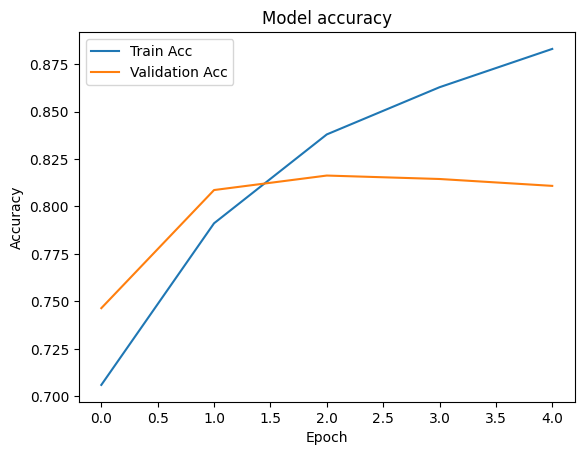

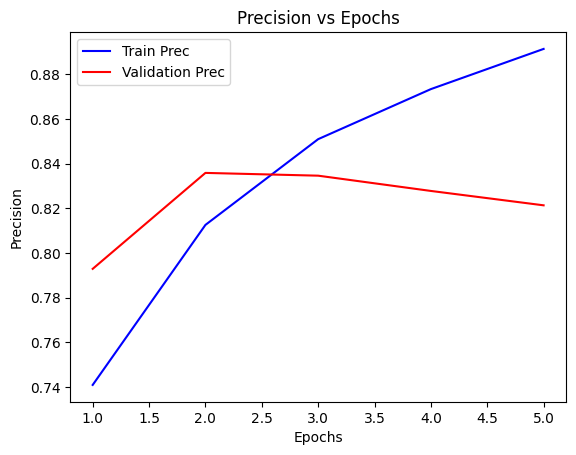

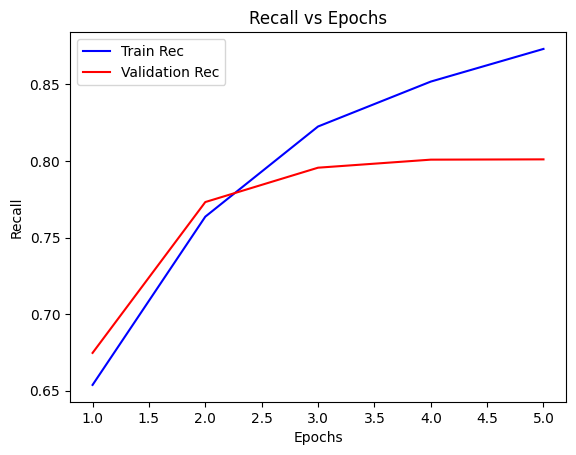

Text(0.5, 1.0, 'Confusion Matrix')

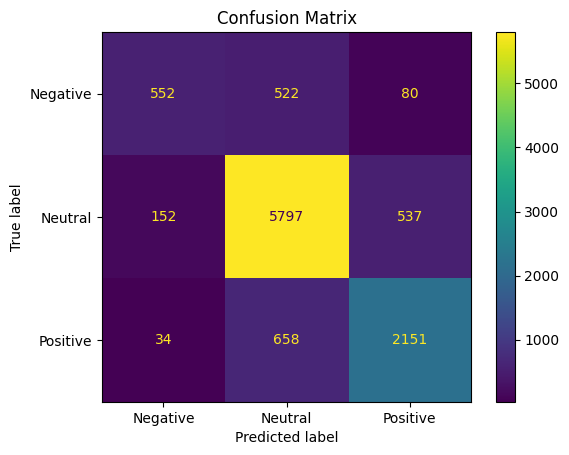

In [7]:
# Evaluate the model.

print("Time taken: {:.2f} seconds".format(end_time - start_time))

# Plot accuracy scores over epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Acc', 'Validation Acc'], loc='upper left')
plt.show()
#plt.savefig("accuracy.jpg")

train_precision = history.history['precision']
val_precision = history.history['val_precision']

# Plot precision scores over epochs.
epochs = range(1, len(train_precision) + 1)
plt.plot(epochs, train_precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Precision vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(['Train Prec', 'Validation Prec'], loc='upper left')
plt.show()
#plt.savefig("precision.jpg")

train_recall = history.history['recall']
val_recall = history.history['val_recall']

# Plot recall scores over epochs.
epochs = range(1, len(train_recall) + 1)
plt.plot(epochs, train_recall, 'b', label='Training recall')
plt.plot(epochs, val_recall, 'r', label='Validation recall')
plt.title('Recall vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend(['Train Rec', 'Validation Rec'], loc='upper left')
plt.show()
#plt.savefig("recall.jpg")

# Plot the confusion matrix.
matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(matrix, display_labels = ['Negative', 'Neutral', 'Positive'])
disp.plot()
plt.title('Confusion Matrix')
#plt.savefig("matrix.jpg")